In [2]:
import numpy as np
from Utils.ProjectPathsSetup import ProjectPathsSetup
from Environment.PathsParameters import *
from Environment.Parameters import *
from Utils.GraphicPlotter import GraphicPlotter
from sklearn.model_selection import train_test_split
ProjectPathsSetup().add_project_paths('./')

In [19]:
#load preprocessed data

#embedding doc
text_embedding_doc = np.loadtxt(PREPROCESSED_DATA_PATH +'embedding_doc_text_arrays.csv', delimiter= ',')
title_embedding_doc = np.loadtxt(PREPROCESSED_DATA_PATH +'embedding_doc_title_arrays.csv', delimiter= ',')

#word2vec
text_w2v_encoded = np.loadtxt(PREPROCESSED_DATA_PATH +'w2v_text_arrays.csv', delimiter= ',')
title_w2v_encoded = np.loadtxt(PREPROCESSED_DATA_PATH +'w2v_title_arrays.csv', delimiter= ',')

#load labels
news_class = np.loadtxt(PREPROCESSED_DATA_PATH + 'labels.csv', delimiter=',')


In [20]:
import json
with open(PREPROCESSED_DATA_PATH + 'vocab_params.txt', 'r') as f:
    vocab_parms = f.read()
w2v_vocab_parms = json.loads(vocab_parms)

In [11]:


# split train/test text and title embedded doc
X_emb_doc_title_train, X_emb_doc_title_test, y_emb_doc_title_train , y_emb_doc_title_test = train_test_split(title_embedding_doc, news_class, train_size=0.8, random_state=SEED)
X_emb_doc_text_train, X_emb_doc_text_test, y_emb_doc_text_train , y_emb_doc_text_test = train_test_split(text_embedding_doc, news_class, train_size=0.8, random_state=SEED)

#split train/test text and title  word vectors

X_w2v_title_train, X_w2v_title_test, y_w2v_title_train , y_w2v_title_test = train_test_split(title_w2v_encoded, news_class, train_size=0.8, random_state=SEED)
X_w2v_text_train, X_w2v_text_test, y_w2v_text_train , y_w2v_text_test = train_test_split(text_w2v_encoded, news_class, train_size=0.8, random_state=SEED)


In [12]:
from DLArchitectures.SimpleDense import SimpleDense

{'text_vocab_size': 27798, 'title_vocab_size': 4901}

In [30]:
from DLArchitectures.SimpleDense import SimpleDense

model_s = SimpleDense(sents_length=TEXT_VEC_DIM).get_model()


In [31]:
graphPlotter=GraphicPlotter()


In [32]:
model_s.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                3232      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,593
Trainable params: 4,593
Non-traina

In [33]:
title_embedding_model_embdoc_simple_dense_hist = model_s.fit(X_w2v_text_train, y_w2v_text_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

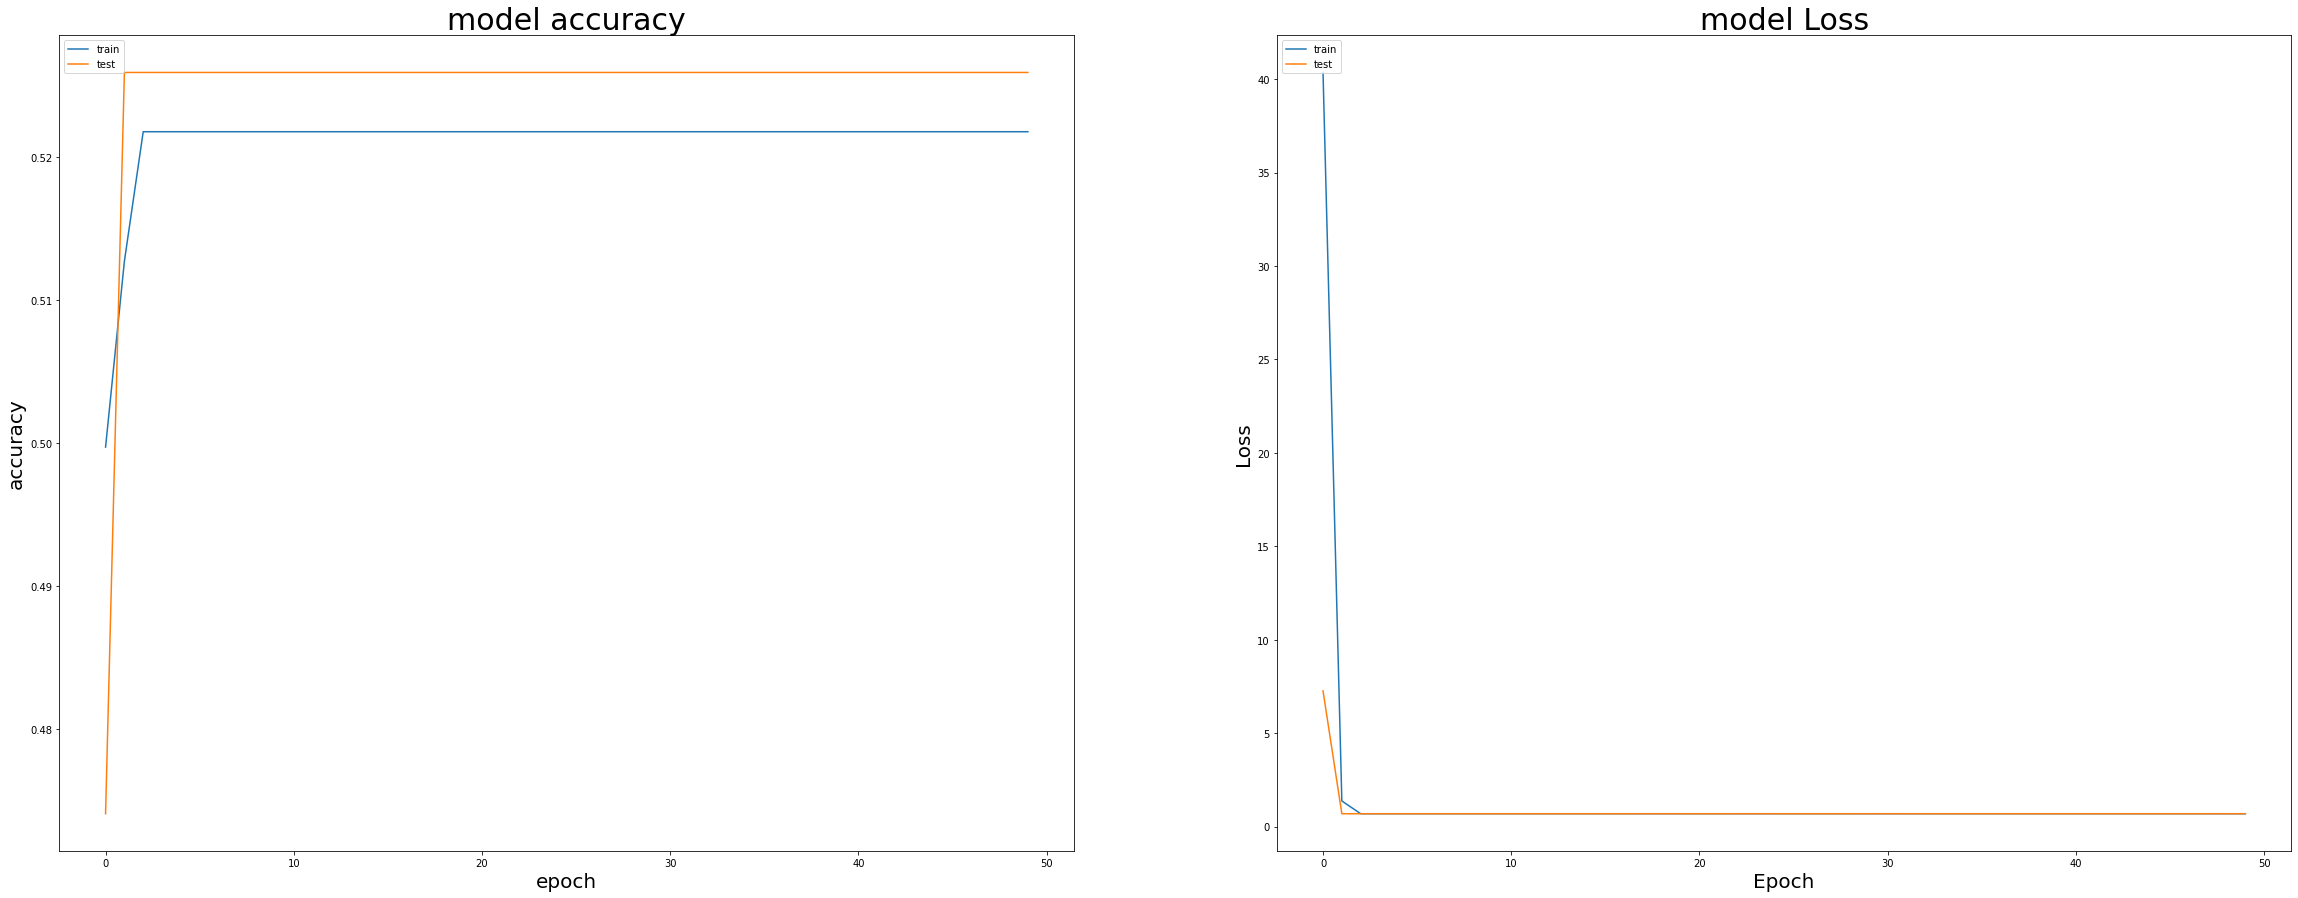

In [34]:
graphPlotter.plot_train_history(title_embedding_model_embdoc_simple_dense_hist)

In [4]:
import gensim
google_pretrained_w2v = gensim.models.KeyedVectors.load_word2vec_format(GOOGLE_PRETRAINED_MODEL_PATH, binary=True)

In [5]:
google_pretrained_w2v

In [1]:
from gensim.models import KeyedVectors

In [ ]:
google_w2v_model =  KeyedVectors.load_word2vec_format(
            '../GoogleNews-vectors-negative300.bin', 
            binary=True)

In [ ]:
emb_mean = google_pretrained_w2v.vectors.mean()
emb_std = google_pretrained_w2v.vectors.std()

In [40]:
from DLArchitectures.TCNModel import TCNModel



emb_matrix = pretrained_embedding_matrix(word2vec, 
                                                     word_index, 
                                                     emb_mean, 
                                                     emb_std)

tcn_model_text_emb = TCNModel(input_dim= VO_SIZE_TEXT).get_model()

ValueError: Layer embedding_2 weight shape (1000, 300) is not compatible with provided weight shape ().

In [1]:
from PreProcessing.TextProcessors.EspecialCharRemover import EspecialCharRemover
from PreProcessing.TextProcessors.TextTokenizer import TextTokenizer
from PreProcessing.TextProcessors.StopWordsEliminator import StopWordsEliminator
from PreProcessing.TextProcessors.TextRSLPSSteammer import TextRSLPSSteammer
from PreProcessing.Encoders.EmbeddingDocEncoder import EmbeddingDocEncoder
from Utils.Concatenator import Cocatenator
from sklearn.pipeline import Pipeline
from Environment.PathsParameters import *
import pandas as pd

fake_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df = pd.read_csv(FAKE_NEWS_DATASET)

news_df = Cocatenator().concatenate( fake_news_df, true_news_df).iloc[:20]

#intantiate preprocessors
charRemover = EspecialCharRemover()
tokenizer =  TextTokenizer()
stopwordEliminator = StopWordsEliminator()

print('\n')
print('='*150)
print('Inicializing Preprocessing setup...')
preprocessors = [
    ('EspecialCharRemover', charRemover),
    ('WordTokeniner', tokenizer),
    ('StopWordsEliminator', stopwordEliminator)
]

pipeline = Pipeline(steps=preprocessors)
data = pipeline.fit_transform(news_df['text'])
stopwordEliminator.word_index

Download 'punkt' NLTK package



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




Download nltk 'stopwords' package 



Inicializing Preprocessing setup...
EspcialCharRemover started preprocessing !!
Removing Especial Characters...
Especial Characters removed !

WordTokenizer started preprocessing !!
Tokenizing Sentences...
Tokenization Done!

StopWordsEliminator started preprocessing !!
Eliminating stopwords...
Stop words Eliminated !



[(0, 'rep'),
 (1, 'jeb'),
 (2, 'hensarling'),
 (3, 'texas'),
 (4, 'announced'),
 (5, 'tuesday'),
 (6, 'seek'),
 (7, 'another'),
 (8, 'term'),
 (9, 'congress'),
 (10, 'telling'),
 (11, 'supporters'),
 (12, 'already'),
 (13, 'stayed'),
 (14, 'far'),
 (15, 'longer'),
 (16, 'originally'),
 (17, 'planned'),
 (19, 'chairman'),
 (20, 'house'),
 (21, 'financial'),
 (22, 'services'),
 (23, 'committee'),
 (24, 'first'),
 (25, 'elected'),
 (27, 'described'),
 (28, 'dallas'),
 (29, 'morning'),
 (30, 'news'),
 (31, 'staunch'),
 (32, 'constitutional'),
 (33, 'conservative'),
 (34, 'passed'),
 (35, 'treasury'),
 (36, 'secretary'),
 (38, 'future'),
 (39, 'source'),
 (40, 'speculation'),
 (41, 'months'),
 (43, 'trump'),
 (46, 'gig'),
 (47, 'ended'),
 (48, 'going'),
 (49, 'steve'),
 (50, 'mnuchin'),
 (57, 'expire'),
 (58, 'end'),
 (59, 'next'),
 (60, 'year'),
 (62, 'tries'),
 (63, 'roll'),
 (64, 'back'),
 (65, 'obama'),
 (66, 'regs'),
 (68, 'june'),
 (69, 'saw'),
 (71, 'ok'),
 (75, 'reaching'),
 (76, 'b

In [2]:
from Utils.JSONHandler import JSONHandler

JSONHandler().save_json(PREPROCESSED_DATA_PARAMS_PATH + 'test.json', {'word_index':stopwordEliminator.word_index})

In [3]:
test_json  =  JSONHandler().read_json(PREPROCESSED_DATA_PARAMS_PATH + 'test.json')

In [10]:
lst = []
for tokens in news_df['text'].apply(lambda x: x.split(' ')):
    for idx, token in enumerate(tokens):
        lst.append((idx, token))

0     JUST IN: Senior GOP Rep Announces His Retireme...
1     WOW! FBI ASST DIRECTOR: They used to kill peop...
2     Uzbek leader says he will curb power of state ...
3     NEW POLL IS BAD NEWS FOR OBAMA’S MANUFACTURED ...
4     Oscar Winning Actress JENNIFER LAWRENCE Recall...
5     Trump says Puerto Rico's debt will have to be ...
6     Kansas governor eyes tobacco bonds for budget ...
7     Xi's power on parade as China party congress l...
8      Rabid Conservatives Blame Obama After Fox Rep...
9     NEW YORK MAN SHOCKED To Discover Who Was Steal...
10    Brazil tries to avert credit downgrade as pens...
11     Democrats Chant Warning To GOP As Trumpcare P...
12     Bill Maher: Trump’s Orlando Massacre Response...
13     WATCH: Conservatives Don’t Punch Nazis, They ...
14    Canada finance minister says will adopt blind ...
15     Dan Rather Responds To Trump’s Sex Tape Alleg...
16    GOP PRESIDENTIAL CANDIDATE MARCO RUBIO CASTS D...
17     WATCH: Sarah Palin Dehumanizes Black Peop